- ## Análise de sentimento
    - textblob
    - vader
    - bert

In [1]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [32]:
# bibliotecas
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib_venn import venn3, venn3_circles

In [5]:
# carregando arquivo tratado em dataframe
df_tblob = pd.read_csv('treated/df_tblob.csv', sep=',')
df_vader = pd.read_csv('treated/df_vader.csv', sep=',')
df_bert = pd.read_csv('treated/df_bert.csv', sep=',')

In [14]:
df_tblob.head(5)    

,Tweets,TB_Polarity,TB_Subjectivity,Textblob
0,crazy that is going to > market cap at the ne...,0.125000,0.600,Positivo
1,"crazy part is, a lot of what i have been tradi...",-0.600000,0.900,Negativo
2,stacking on support..,0.000000,0.000,Neutro
3,lfg!!,0.000000,0.000,Neutro
4,- twitter been super bullish on this one and t...,0.195833,0.325,Positivo


In [9]:
df_tblob.rename(columns={df_tblob.columns[0]: 'Tweets'},inplace=True)

In [11]:
df_tblob.rename(columns={'Sentiment': 'Textblob'},inplace=True)

In [13]:
df_tblob.rename(columns={'polarity': 'TB_Polarity','subjectivity':'TB_Subjectivity'},inplace=True)

In [15]:
df_tblob.head(5) 

,Tweets,TB_Polarity,TB_Subjectivity,Textblob
0,crazy that is going to > market cap at the ne...,0.125000,0.600,Positivo
1,"crazy part is, a lot of what i have been tradi...",-0.600000,0.900,Negativo
2,stacking on support..,0.000000,0.000,Neutro
3,lfg!!,0.000000,0.000,Neutro
4,- twitter been super bullish on this one and t...,0.195833,0.325,Positivo


In [7]:
df_vader.head(5)

,0,Sentiment,neg,neu,pos,compound
0,crazy that is going to > market cap at the ne...,Negativo,0.182,0.765,0.053,-0.6597
1,"crazy part is, a lot of what i have been tradi...",Negativo,0.179,0.821,0.000,-0.3400
2,stacking on support..,Neutro,0.000,1.000,0.000,0.0000
3,lfg!!,Neutro,0.000,1.000,0.000,0.0000
4,- twitter been super bullish on this one and t...,Positivo,0.000,0.809,0.191,0.7650


In [16]:
df_vader.rename(columns={df_vader.columns[0]: 'Tweets',
                    'Sentiment':'Vader',
                    'compound':'VD_Polarity'},inplace=True)

In [18]:
df_vader.drop(['neg', 'neu', 'pos'], axis=1, inplace=True)

In [19]:
df_vader.head(5)

,Tweets,Vader,VD_Polarity
0,crazy that is going to > market cap at the ne...,Negativo,-0.6597
1,"crazy part is, a lot of what i have been tradi...",Negativo,-0.3400
2,stacking on support..,Neutro,0.0000
3,lfg!!,Neutro,0.0000
4,- twitter been super bullish on this one and t...,Positivo,0.7650


In [8]:
df_bert.head(5)

,0,Sentiment
0,crazy that is going to > market cap at the ne...,Negativo
1,"crazy part is, a lot of what i have been tradi...",Neutro
2,stacking on support..,Neutro
3,lfg!!,Negativo
4,- twitter been super bullish on this one and t...,Positivo


In [20]:
df_bert.rename(columns={df_bert.columns[0]: 'Tweets',
                    'Sentiment':'BERT'},inplace=True)

In [21]:
df_bert.head(5)

,Tweets,BERT
0,crazy that is going to > market cap at the ne...,Negativo
1,"crazy part is, a lot of what i have been tradi...",Neutro
2,stacking on support..,Neutro
3,lfg!!,Negativo
4,- twitter been super bullish on this one and t...,Positivo


In [22]:
df_vader.drop(['Tweets'], axis=1, inplace=True)
df_bert.drop(['Tweets'], axis=1, inplace=True)

In [ ]:
pdList = [df_tblob,df_vader,df_bert ]
df_comp = pd.concat((pdList),axis=1)

In [24]:
df_comp = df_comp[["Tweets","Textblob","Vader","BERT","TB_Polarity","VD_Polarity"]]

In [25]:
df_comp.head(5)

,Tweets,Textblob,Vader,BERT,TB_Polarity,VD_Polarity
0,crazy that is going to > market cap at the ne...,Positivo,Negativo,Negativo,0.125000,-0.6597
1,"crazy part is, a lot of what i have been tradi...",Negativo,Negativo,Neutro,-0.600000,-0.3400
2,stacking on support..,Neutro,Neutro,Neutro,0.000000,0.0000
3,lfg!!,Neutro,Neutro,Negativo,0.000000,0.0000
4,- twitter been super bullish on this one and t...,Positivo,Positivo,Positivo,0.195833,0.7650


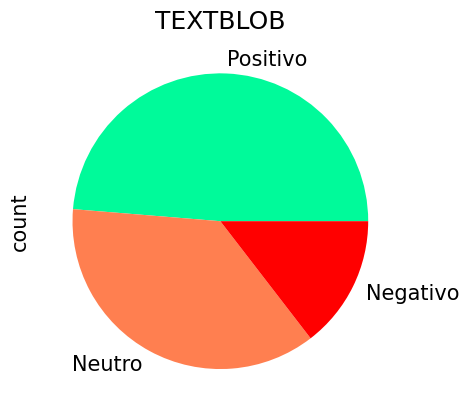

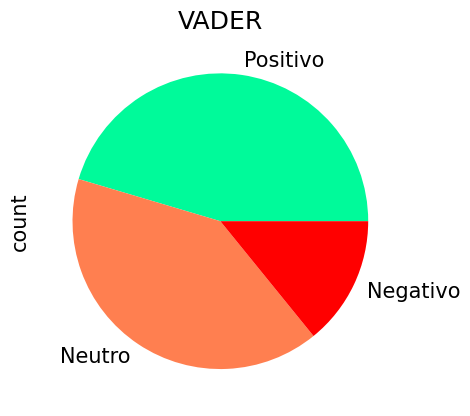

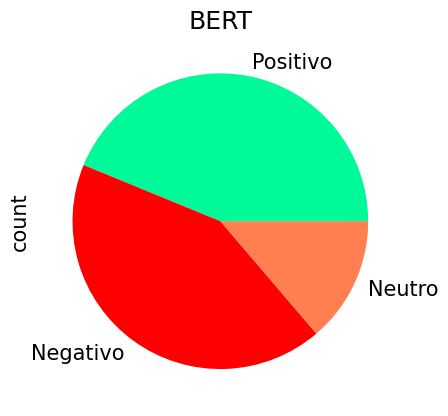

In [29]:
colors={'Positivo':'mediumspringgreen', 
        'Neutro':'coral',
        'Negativo': 'Red'}

plt.figure(0)
plt.title('TEXTBLOB')
df_comp["Textblob"].value_counts().plot(kind="pie", colors=[colors[v] for v in df_comp['Textblob'].value_counts().keys()])

plt.figure(1)
plt.title('VADER')
df_comp["Vader"].value_counts().plot(kind="pie",colors=[colors[v] for v in df_comp['Vader'].value_counts().keys()])

plt.figure(2)
plt.title('BERT')
df_comp["BERT"].value_counts().plot(kind="pie",colors=[colors[v] for v in df_comp['BERT'].value_counts().keys()])

plt.rc('font', size= 15)
plt.show() 

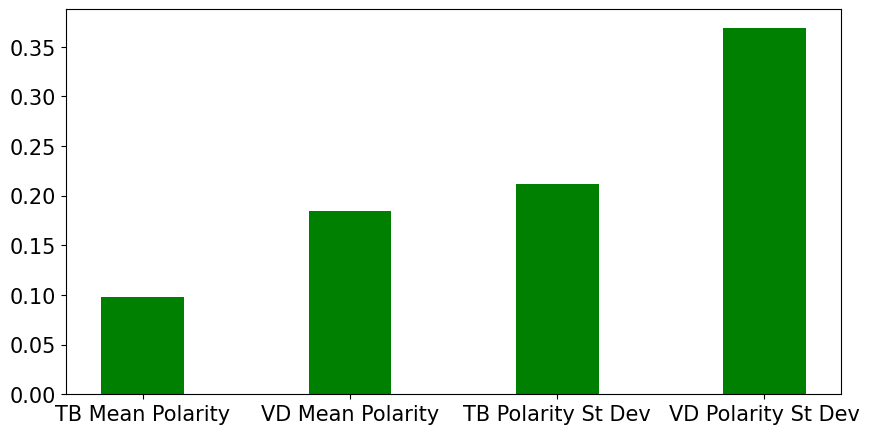

In [30]:
data = {'TB Mean Polarity':df_comp["TB_Polarity"].mean(),
        'VD Mean Polarity':df_comp["VD_Polarity"].mean(),
        'TB Polarity St Dev':df_comp["TB_Polarity"].std(),
        'VD Polarity St Dev':df_comp["VD_Polarity"].std()}

stats = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(stats, values, color ='green',
        width = 0.4)
 
plt.show()

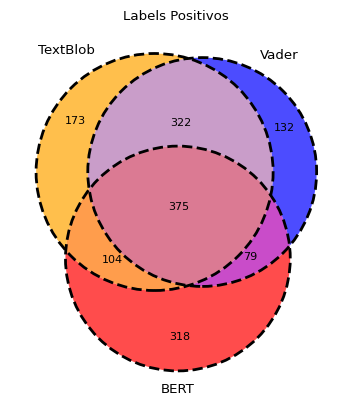

In [40]:
venn3(subsets=(df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  != "Positivo") & (df_comp.BERT  != "Positivo")].shape[0],
               df_comp[(df_comp.Textblob != "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  != "Positivo")].shape[0],
               df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  != "Positivo")].shape[0],
               df_comp[(df_comp.Textblob != "Positivo") & (df_comp.Vader  != "Positivo") & (df_comp.BERT  == "Positivo")].shape[0],
               df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  != "Positivo") & (df_comp.BERT  == "Positivo")].shape[0],
               df_comp[(df_comp.Textblob != "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  == "Positivo")].shape[0],
               df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  == "Positivo")].shape[0]), 
      set_labels=('TextBlob', 'Vader', 'BERT'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)

venn3_circles(subsets=(df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  != "Positivo") & (df_comp.BERT  != "Positivo")].shape[0],
               df_comp[(df_comp.Textblob != "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  != "Positivo")].shape[0],
               df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  != "Positivo")].shape[0],
               df_comp[(df_comp.Textblob != "Positivo") & (df_comp.Vader  != "Positivo") & (df_comp.BERT  == "Positivo")].shape[0],
               df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  != "Positivo") & (df_comp.BERT  == "Positivo")].shape[0],
               df_comp[(df_comp.Textblob != "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  == "Positivo")].shape[0],
               df_comp[(df_comp.Textblob == "Positivo") & (df_comp.Vader  == "Positivo") & (df_comp.BERT  == "Positivo")].shape[0]),
              linestyle="dashed", linewidth=2)

plt.title("Labels Positivos")

plt.rc('font', size= 8) 

plt.show()

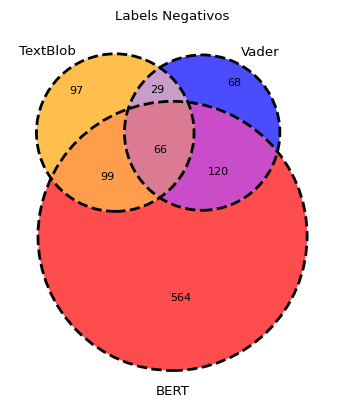

In [41]:
venn3(subsets=(df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  != "Negativo") & (df_comp.BERT  != "Negativo")].shape[0],
               df_comp[(df_comp.Textblob != "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  != "Negativo")].shape[0],
               df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  != "Negativo")].shape[0],
               df_comp[(df_comp.Textblob != "Negativo") & (df_comp.Vader  != "Negativo") & (df_comp.BERT  == "Negativo")].shape[0],
               df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  != "Negativo") & (df_comp.BERT  == "Negativo")].shape[0],
               df_comp[(df_comp.Textblob != "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  == "Negativo")].shape[0],
               df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  == "Negativo")].shape[0]), 
      set_labels=('TextBlob', 'Vader', 'BERT'), 
      set_colors=("orange", "blue", "red"), alpha=0.7)

venn3_circles(subsets=(df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  != "Negativo") & (df_comp.BERT  != "Negativo")].shape[0],
               df_comp[(df_comp.Textblob != "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  != "Negativo")].shape[0],
               df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  != "Negativo")].shape[0],
               df_comp[(df_comp.Textblob != "Negativo") & (df_comp.Vader  != "Negativo") & (df_comp.BERT  == "Negativo")].shape[0],
               df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  != "Negativo") & (df_comp.BERT  == "Negativo")].shape[0],
               df_comp[(df_comp.Textblob != "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  == "Negativo")].shape[0],
               df_comp[(df_comp.Textblob == "Negativo") & (df_comp.Vader  == "Negativo") & (df_comp.BERT  == "Negativo")].shape[0]),
              linestyle="dashed", linewidth=2)

plt.title("Labels Negativos")


plt.rc('font', size= 3) 


plt.show()

In [42]:
df_sample = df_comp.sample(n = 20)

df_sample

,Tweets,Textblob,Vader,BERT,TB_Polarity,VD_Polarity
32,#bitcoin not the worst looking chart.bulls nee...,Negativo,Positivo,Neutro,-0.194444,0.4577
306,#grok ltf bullish structureas long as it makes...,Positivo,Negativo,Positivo,0.100000,-0.2023
44,: dips are an inevitable part of #bitcoin bull...,Neutro,Negativo,Negativo,0.000000,-0.5106
1940,"look at this endless bleed, changing into an a...",Negativo,Neutro,Negativo,-0.062500,0.0000
1274,looks like a successful retest of the 4h trend...,Positivo,Positivo,Positivo,0.366667,0.7430
105,"vol is still technically really low, your not ...",Negativo,Negativo,Negativo,-0.150000,-0.3384
828,when you zoom out you have to admire the preci...,Neutro,Positivo,Positivo,0.000000,0.4767
61,. lba day 2:- tvl- suppliedincredible.up on...,Neutro,Neutro,Negativo,0.000000,0.0000
1270,the spot hit 80% profit now in just a few day...,Positivo,Positivo,Positivo,0.125000,0.8271
223,slap yourself if you fomo would instead of bi...,Negativo,Positivo,Negativo,-0.250000,0.3199
